In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime
import squarify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/cp2/2019-Oct.csv')
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [ ]:
data.shape

(42448764, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [ ]:
data.isnull().any(axis = 0)

event_time       False
event_type       False
product_id       False
category_id      False
category_code     True
brand             True
price            False
user_id          False
user_session      True
dtype: bool

In [ ]:
data.dropna(how='any',inplace = True)
data.isnull().any(axis = 0)

event_time       False
event_type       False
product_id       False
category_id      False
category_code    False
brand            False
price            False
user_id          False
user_session     False
dtype: bool

In [ ]:
#data.drop(['category_id', 'user_session'], axis=1, inplace= True)

In [ ]:
def conv_date_time(date_time_utc):
    date_utc = datetime.strptime(date_time_utc[0:10], '%Y-%m-%d').date()
    
    return date_utc

In [ ]:
data['event_date'] = data['event_time'].apply(lambda strn: conv_date_time(strn))
visitors_per_day = data[['event_date','user_id']].drop_duplicates().groupby(['event_date'])['user_id'].agg(['count']).sort_values(by = ['event_date'],ascending=True)

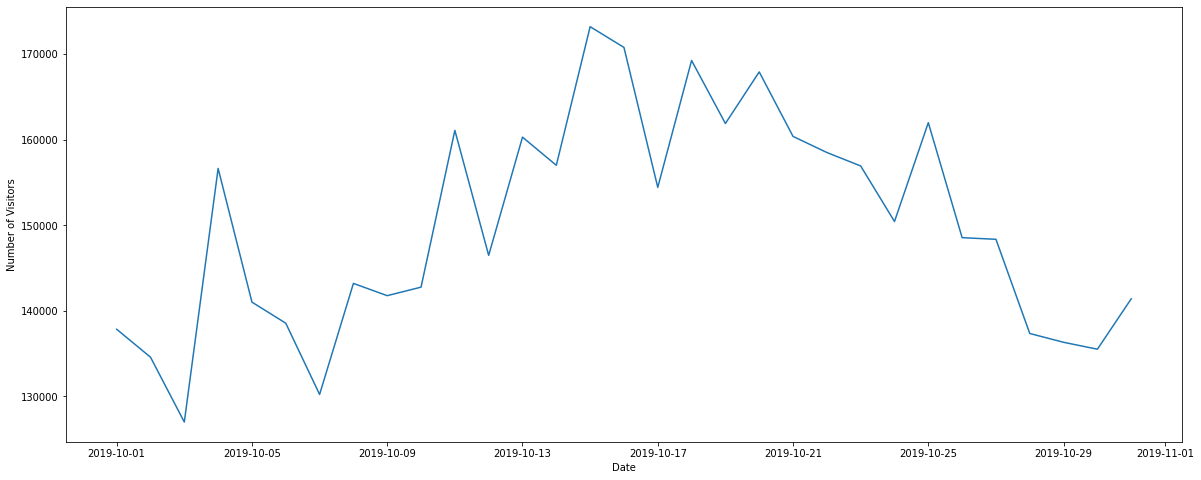

In [ ]:
x_value = pd.Series(visitors_per_day.index.values)
y_value = visitors_per_day['count']
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(x_value,y_value)
plt.xlabel("Date")
plt.ylabel("Number of Visitors")
plt.show()

In [ ]:
data_event_type = data[['category_code','event_type']].groupby(['category_code','event_type']).size().reset_index(name='total')
data_event_type

,category_code,event_type,total
0,accessories.bag,cart,527
1,accessories.bag,purchase,1100
2,accessories.bag,view,160402
3,accessories.umbrella,cart,5
4,accessories.umbrella,purchase,24
...,...,...,...
330,sport.trainer,purchase,211
331,sport.trainer,view,20520
332,stationery.cartrige,cart,75
333,stationery.cartrige,purchase,115


In [ ]:
only_purchases = data_event_type.loc[data_event_type.event_type == 'purchase'].sort_values(by = 'total',ascending = False)
only_cart = data_event_type.loc[data_event_type.event_type == 'cart'].sort_values(by = 'total',ascending = False)
only_view = data_event_type.loc[data_event_type.event_type == 'view'].sort_values(by = 'total',ascending = False)

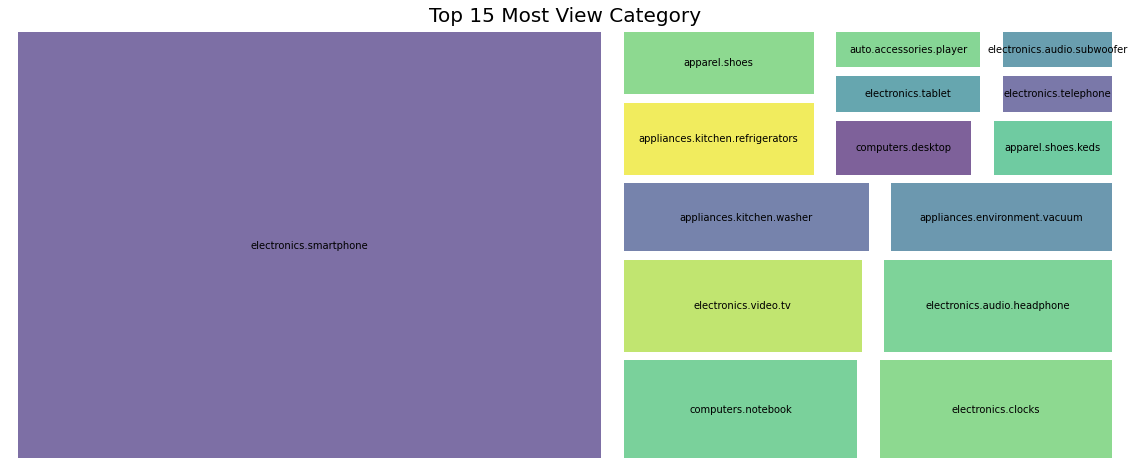

In [ ]:
squarify.plot(sizes= only_view.total[:15], label=only_view.category_code, pad = True, alpha=.7)
plt.axis('off')

plt.title('Top 15 Most View Category',fontdict={'fontsize': 20})
plt.show()

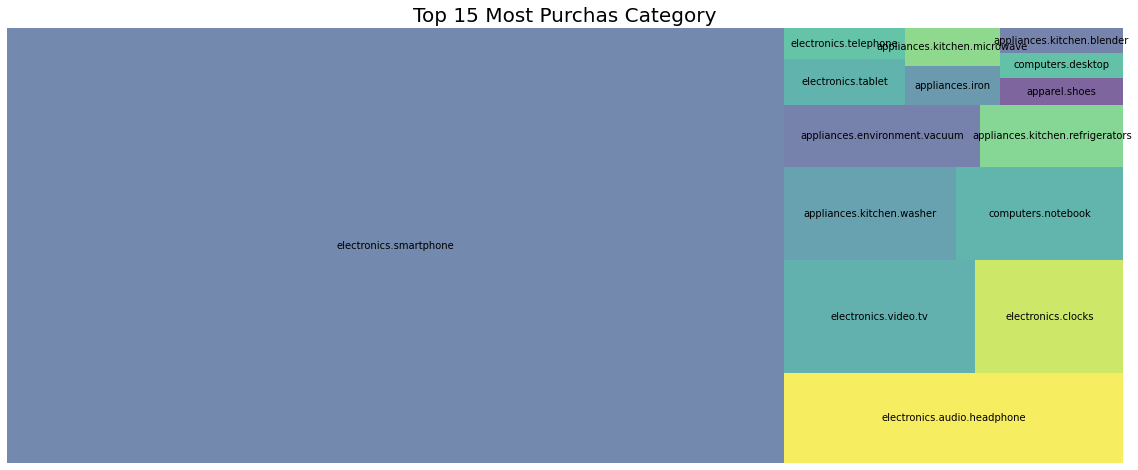

In [ ]:
squarify.plot(sizes= only_purchases.total[:15], label=only_purchases.category_code, alpha=.7)
plt.axis('off')

plt.title('Top 15 Most Purchas Category',fontdict={'fontsize': 20})
plt.show()

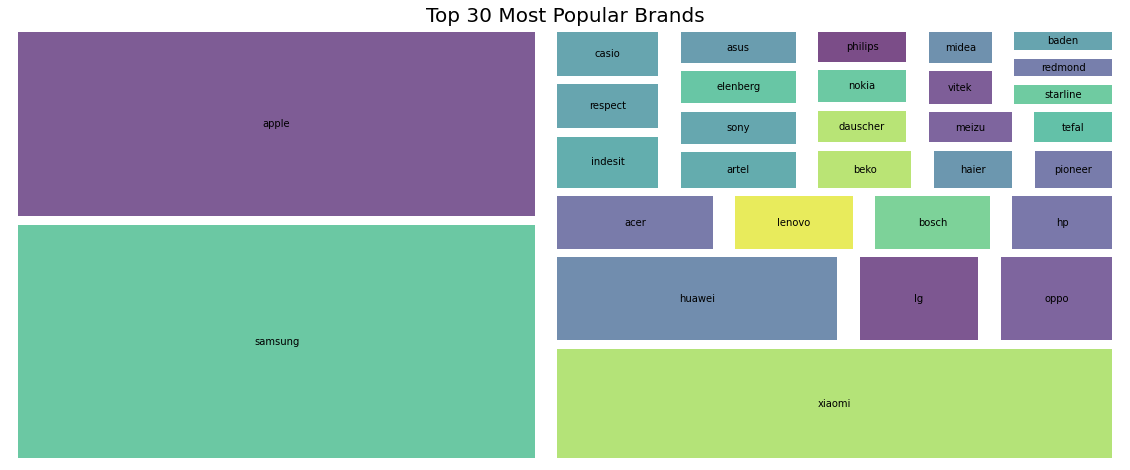

In [ ]:
top_brand_n = 30
top_brand = data['brand'].value_counts()[:top_brand_n].sort_values(ascending=False)
df = pd.DataFrame({'count':top_brand, 'top_category':top_brand.index.array })

squarify.plot(sizes=top_brand, label=top_brand.index.array,pad = True, alpha=.7)
plt.axis('off')
plt.title('Top 30 Most Popular Brands', fontdict={'fontsize': 20})
plt.show()

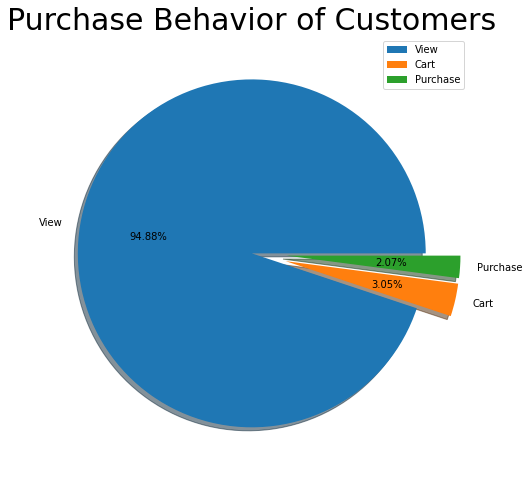

In [ ]:
labels = ['View', 'Cart', 'Purchase']
size = data['event_type'].value_counts()
explode = [0, 0.2,0.2]

plt.figure(figsize=(8,8))
plt.pie(size, explode = explode, labels = labels, shadow=True, autopct = '%.2f%%')
plt.title('Purchase Behavior of Customers',fontdict={'fontsize': 30})
plt.legend()
plt.show()

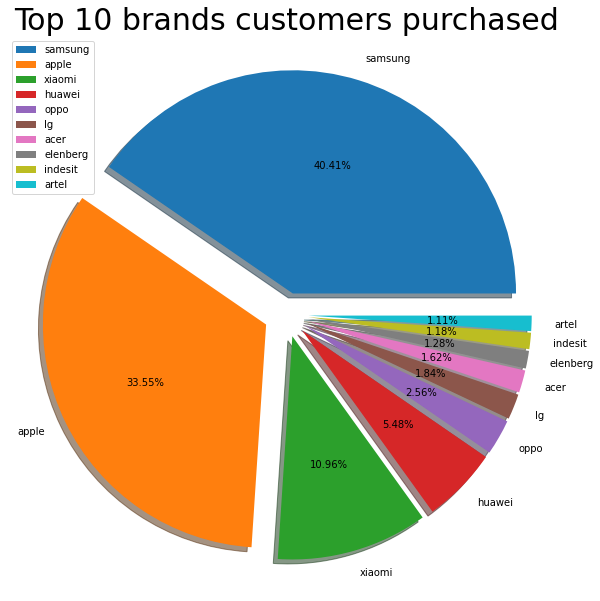

In [ ]:
purchase = data.loc[data['event_type'] == 'purchase']
top_selling_brands = purchase.groupby(['brand']).size().sort_values(ascending = False).to_frame('Total')

labels = top_selling_brands.index.values[:10]
size = top_selling_brands['Total'][:10]
explode = [0.1] *10
plt.figure(figsize=(10,11))
plt.pie(size, explode = explode, labels = labels, shadow=True, autopct = '%.2f%%')
plt.title('Top 10 brands customers purchased',fontdict={'fontsize': 30})
plt.legend()
plt.show()

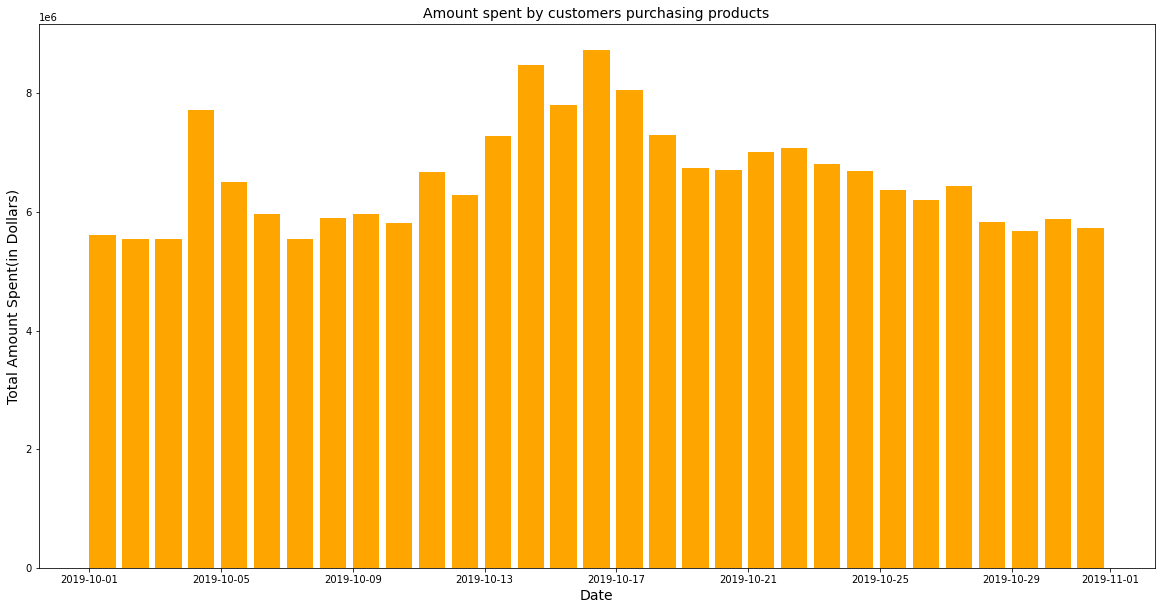

In [ ]:
purchase_data = purchase[['event_date','price']].groupby(['event_date']).agg('sum')

plt.figure(figsize=(20,10))

plt.bar(purchase_data.index.values,purchase_data['price'], color = 'orange',align='edge')
plt.title('Amount spent by customers purchasing products', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Amount Spent(in Dollars)', fontsize=14)
plt.show()